# Bike rental linear regression

First, let us import necessary libraries, read the csv data file and have an initial analysis.

In [173]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
#Reading the csv file
bike_df=pd.read_csv(r'day.csv')

In [175]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [176]:
#Checking the shape of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are 730 rows and 16 columns, of which 1 is date type and others are numerical.

In [177]:
#Columns are :
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [178]:
#Describing the dataset to see the basic statistical information
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Now let us check the null values in each column


In [179]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset :)

Now let us check the head of dataset again, to see if we can drop any columns

In [180]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


'instant' is a repetitive index, so we can drop it

In [181]:
bike_df.drop(['instant'],axis=1,inplace=True)

In [182]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Day of the date can be skipped for this analysis, as month and year information is already present. Hence we can either drop 'dteday' and keep 'yr' and 'mnth' columns or we can keep 'dteday' and drop 'yr' and 'mnth' columns.

In [183]:
#Dropping 'dteday' column
bike_df.drop(['dteday'],inplace=True, axis=1)

In [184]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
#let us rename some columns for more clarity
bike_df=bike_df.rename(columns={'yr':'Year','mnth':'Month','cnt':'Count'})

In [186]:
bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
# Now let us deal with categorical variables

## From readme.md:
    season : season (1:spring, 2:summer, 3:fall, 4:winter)
    yr : year (0: 2018, 1:2019)
    mnth : month ( 1 to 12)
    holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    weekday : day of the week
    workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    weathersit : 
            - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp : temperature in Celsius
    atemp: feeling temperature in Celsius
    hum: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    cnt: count of total rental bikes including both casual and registered
	

We can observe that year,month, holiday, working day,weathersit are all categorical variables. Next we will encode them with appropriate values

In [188]:
bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_df.tail()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Count
725,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [189]:
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [190]:
bike_df['weathersit'].replace({1:"Clear_Few Clouds_Partly cloudy",2:"Mist cloudy_Broken clouds_Few clouds",3:"Light rain_Light snow_Thunderstorm_Scattered clouds",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist_Snow_Fog'},inplace=True)
bike_df.head()


,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Count
0,spring,0,1,0,6,0,Mist cloudy_Broken clouds_Few clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,Mist cloudy_Broken clouds_Few clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [191]:
bike_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_df.head(10)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Count
0,spring,0,1,0,Saturday,0,Mist cloudy_Broken clouds_Few clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,Sunday,0,Mist cloudy_Broken clouds_Few clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds_Partly cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,0,Friday,1,Mist cloudy_Broken clouds_Few clouds,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,0,Saturday,0,Mist cloudy_Broken clouds_Few clouds,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds_Partly cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [192]:
bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Count
0,spring,0,1,0,Saturday,0,Mist cloudy_Broken clouds_Few clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,Sunday,0,Mist cloudy_Broken clouds_Few clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Our target variable is Count, and it is a sum of casual and registered. Hence we can drop casual and registered

In [193]:
bike_df.drop(['casual','registered'],axis=1,inplace=True)
bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Count
0,spring,0,1,0,Saturday,0,Mist cloudy_Broken clouds_Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy_Broken clouds_Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds_Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [196]:
#Now let us set data type of numercal variables 
bike_df[['temp','atemp','hum','windspeed','Count']]=bike_df[['temp','atemp','hum','windspeed','Count']].apply(pd.to_numeric)

In [197]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


## Exploratory Data Analysis

First let us see the relationship between variables using a pairplot.

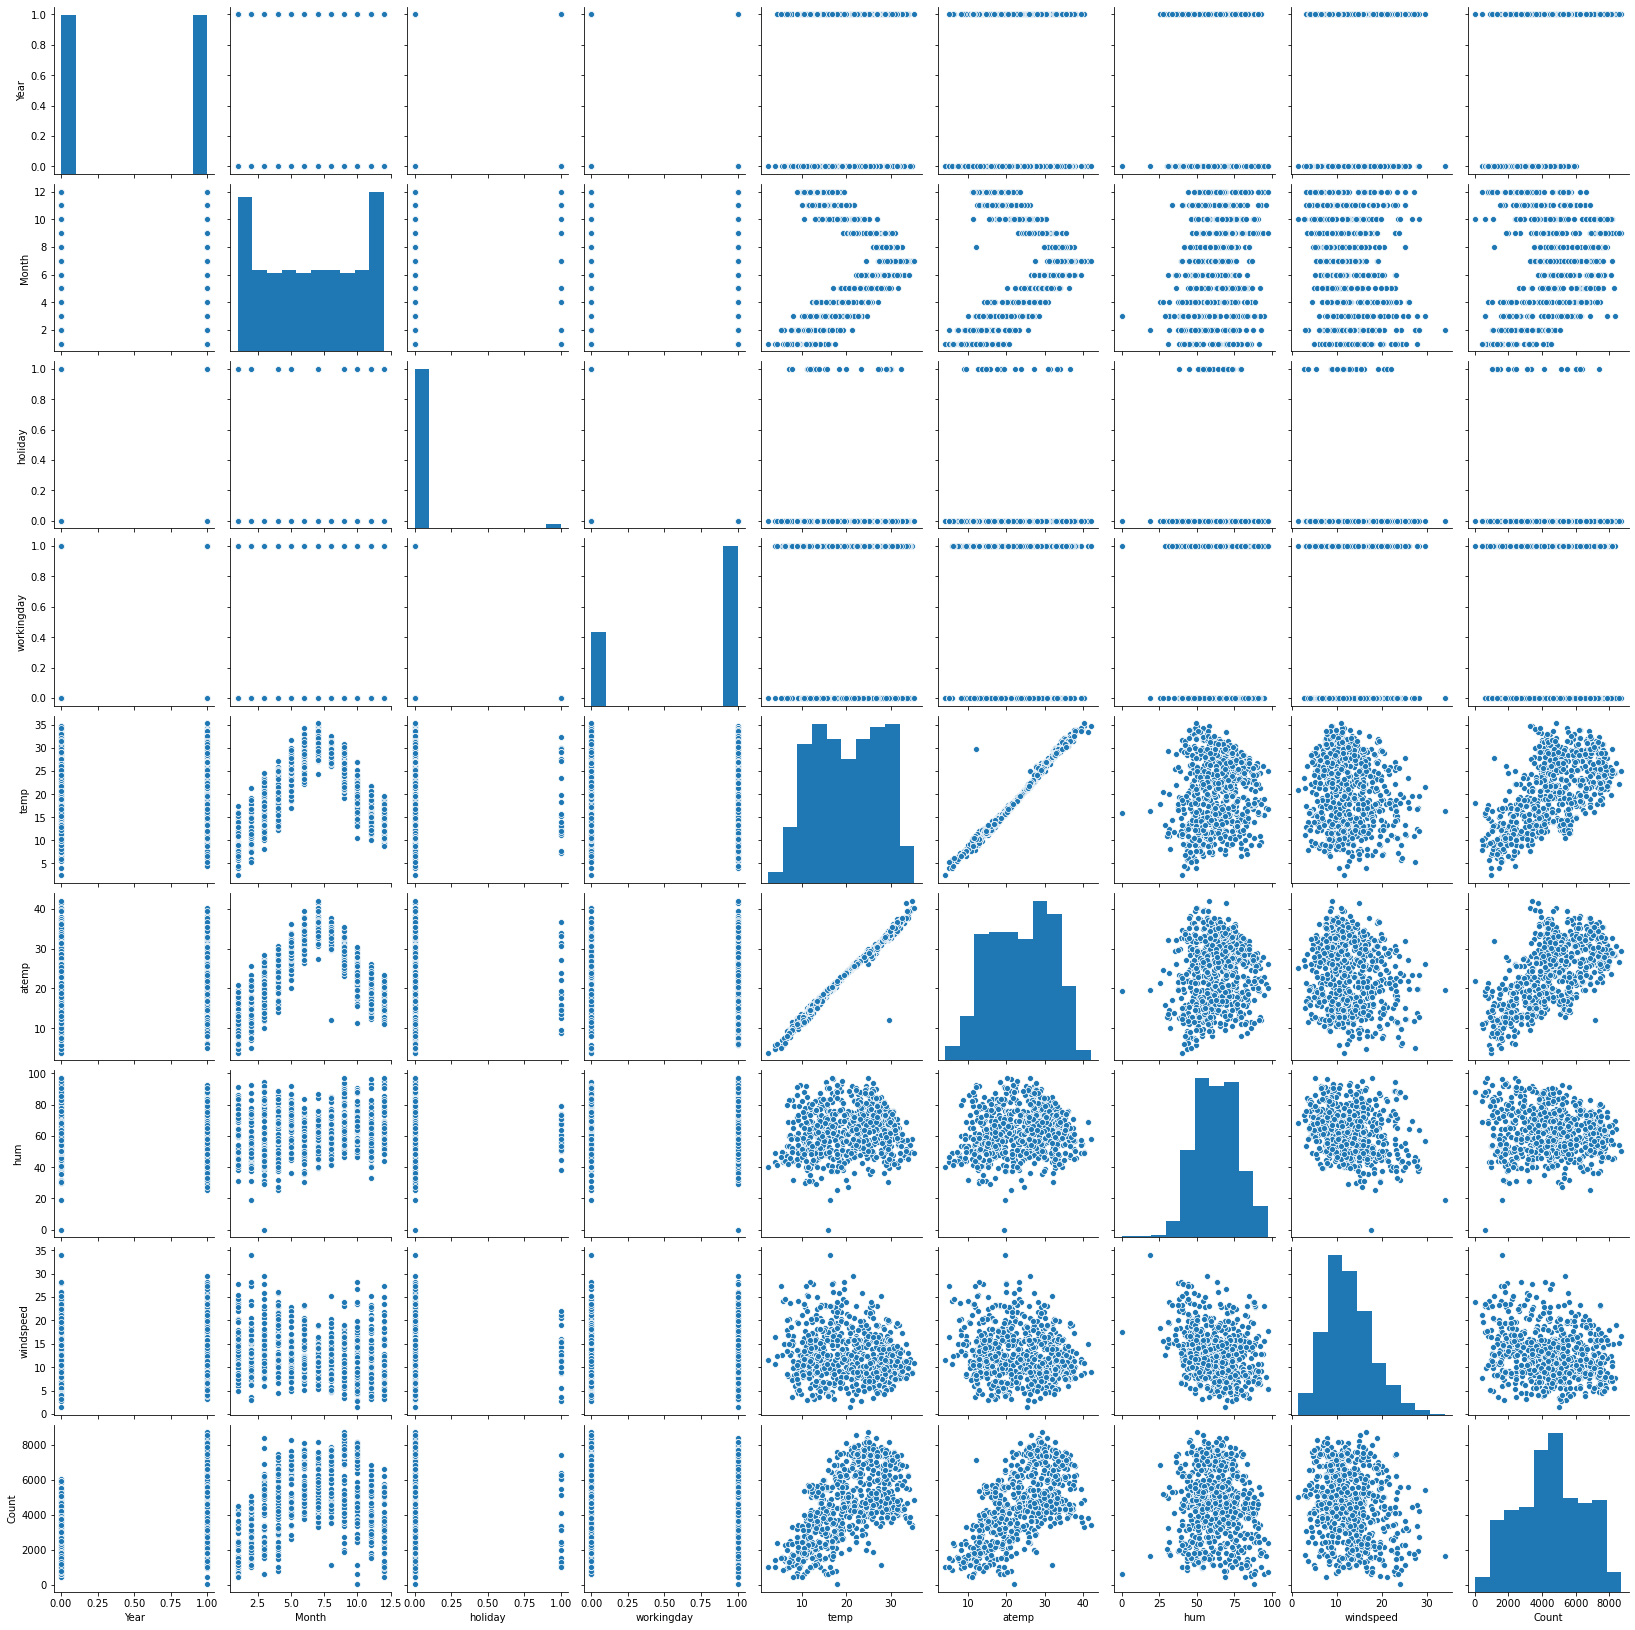

In [198]:
sns.pairplot(bike_df)
plt.show()

We can observe a linear relationship between temperature and count and temperature and atemp. Now let us do a correlation heatmap

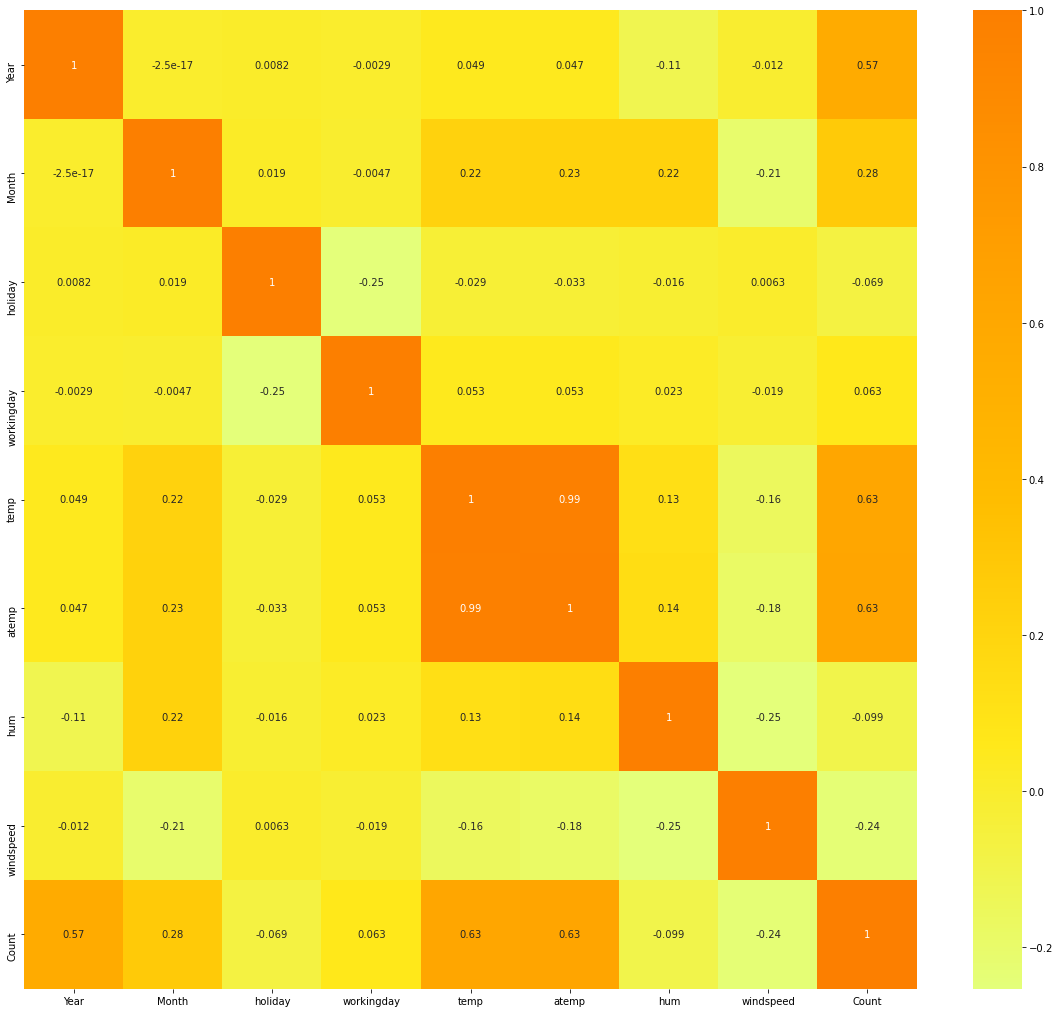

In [199]:
plt.figure(figsize = (20, 18))
sns.heatmap(bike_df.corr(), annot = True, cmap='Wistia')
plt.show()

Count has a high correlation with year and temperature. Also correlation between temp and atemp is 0.99, which means only one is required

In [200]:
#Dropping atemp
bike_df.drop(['atemp'],axis=1,inplace=True)
bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,hum,windspeed,Count
0,spring,0,1,0,Saturday,0,Mist cloudy_Broken clouds_Few clouds,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy_Broken clouds_Few clouds,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds_Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds_Partly cloudy,9.305237,43.6957,12.522300,1600


Now let us visualize categorical variables using boxplots

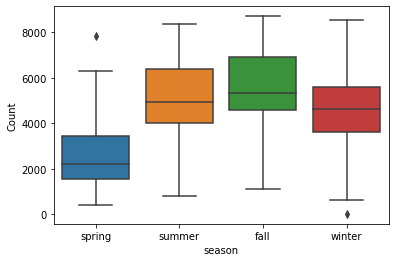

In [201]:
sns.boxplot(x = 'season', y = 'Count', data = bike_df)
plt.show()

We can observe that count is less during spring and is highest during fall.

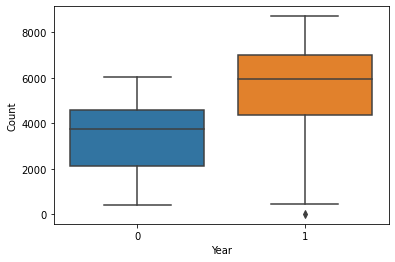

In [202]:
sns.boxplot(x = 'Year', y = 'Count', data = bike_df)
plt.show()

It is observed that Count has increased in 2019.

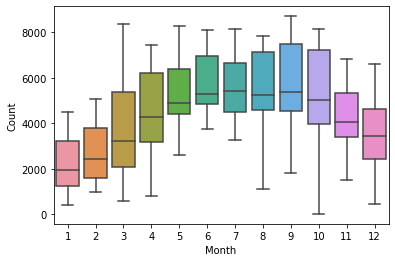

In [203]:
sns.boxplot(x = 'Month', y = 'Count', data = bike_df)
plt.show()

The count-month plot follows a normal distribution and count is highest during July - October

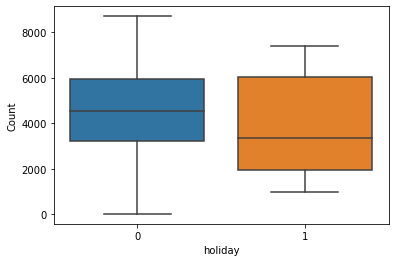

In [204]:
sns.boxplot(x = 'holiday', y = 'Count', data = bike_df)
plt.show()

Count is lesser on holidays, compared to non- holidays

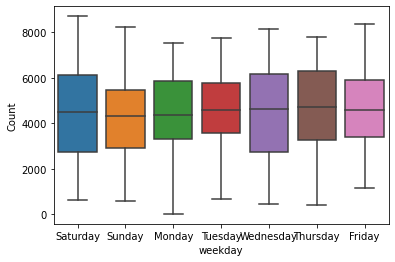

In [205]:
sns.boxplot(x = 'weekday', y = 'Count', data = bike_df)
plt.show()

All weekdays have similar count

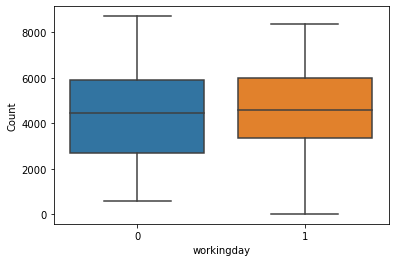

In [206]:
sns.boxplot(x = 'workingday', y = 'Count', data = bike_df)
plt.show()

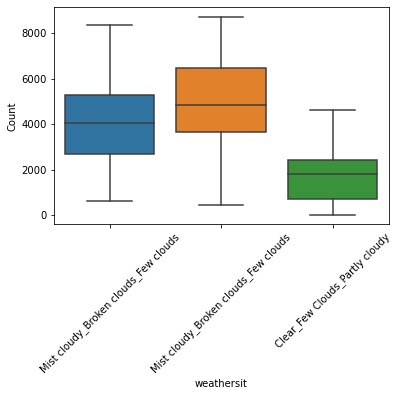

In [207]:
ax=sns.boxplot(x = 'weathersit', y = 'Count', data = bike_df)
ax.set_xticklabels(labels=bike_df['weathersit'].values,rotation=45)
plt.show()

Count is highest when weather is misty/cloudy/broken clouds/ few clouds

In [208]:
#No let us change the data type of all categorical variables into object
bike_df['Month']=bike_df['Month'].astype(object)
bike_df['season']=bike_df['season'].astype(object)
bike_df['weathersit']=bike_df['weathersit'].astype(object)
bike_df['weekday']=bike_df['weekday'].astype(object)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  Count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [209]:
#Create dummy variables for categorical data
season_type=pd.get_dummies(bike_df['season'],drop_first=True)
Weather_type=pd.get_dummies(bike_df['weathersit'],drop_first=True)
week_day=pd.get_dummies(bike_df['weekday'],drop_first=True)
Month_num=pd.get_dummies(bike_df['Month'],drop_first=True)



In [210]:
bike_df=pd.concat([bike_df,season_type],axis=1)
bike_df=pd.concat([bike_df,Weather_type],axis=1)
bike_df=pd.concat([bike_df,week_day],axis=1)
bike_df=pd.concat([bike_df,Month_num],axis=1)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   season                                               730 non-null    object 
 1   Year                                                 730 non-null    int64  
 2   Month                                                730 non-null    object 
 3   holiday                                              730 non-null    int64  
 4   weekday                                              730 non-null    object 
 5   workingday                                           730 non-null    int64  
 6   weathersit                                           730 non-null    object 
 7   temp                                                 730 non-null    float64
 8   hum                                                  730 non-null    f

In [211]:
#Now let us delete original columns

bike_df.drop(['season'],axis=1,inplace=True)
bike_df.drop(['weathersit'],axis=1,inplace=True)

bike_df.drop(['weekday'],axis=1,inplace=True)

bike_df.drop(['Month'],axis=1,inplace=True)


bike_df.head()

,Year,holiday,workingday,temp,hum,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model creation


In [216]:
#Splitting the data into training and test set.

from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
bike_train.head()

,Year,holiday,workingday,temp,hum,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [218]:
bike_test.head()

,Year,holiday,workingday,temp,hum,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [219]:
bike_test.shape

(219, 29)

In [220]:
bike_train.shape

(510, 29)

In [221]:
bike_test.columns

Index([                                               'Year',
                                                   'holiday',
                                                'workingday',
                                                      'temp',
                                                       'hum',
                                                 'windspeed',
                                                     'Count',
                                                    'spring',
                                                    'summer',
                                                    'winter',
       'Light rain_Light snow_Thunderstorm_Scattered clouds',
                      'Mist cloudy_Broken clouds_Few clouds',
                                                    'Monday',
                                                  'Saturday',
                                                    'Sunday',
                                                  'Thursday',
        

In [222]:
bike_train.columns


Index([                                               'Year',
                                                   'holiday',
                                                'workingday',
                                                      'temp',
                                                       'hum',
                                                 'windspeed',
                                                     'Count',
                                                    'spring',
                                                    'summer',
                                                    'winter',
       'Light rain_Light snow_Thunderstorm_Scattered clouds',
                      'Mist cloudy_Broken clouds_Few clouds',
                                                    'Monday',
                                                  'Saturday',
                                                    'Sunday',
                                                  'Thursday',
        

In [223]:
#Let us scale the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [225]:
numerical_vars= ['Count','temp','hum','windspeed']

In [226]:
bike_train[numerical_vars] = scaler.fit_transform(bike_train[numerical_vars])

<ipython-input-226-506384dfe90d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[numerical_vars] = scaler.fit_transform(bike_train[numerical_vars])
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [227]:
#Now lets train the model using training dataset. Let us create x train and y train
y_train = bike_train.pop('Count')
X_train = bike_train

In [228]:
X_train.head()

,Year,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm_Scattered clouds,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [229]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

In [230]:
X_train.shape

(510, 28)

## Building the model

In [231]:
#Now lets train usinf RFE for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [232]:
#Let us run the RFE using output variables as 10
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rfe = RFE(linear_model, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)    

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [233]:


list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm_Scattered clouds', True, 1),
 ('Mist cloudy_Broken clouds_Few clouds', True, 1),
 ('Monday', False, 16),
 ('Saturday', False, 8),
 ('Sunday', False, 15),
 ('Thursday', False, 18),
 ('Tuesday', False, 17),
 ('Wednesday', False, 19),
 (2, False, 11),
 (3, False, 3),
 (4, False, 4),
 (5, False, 2),
 (6, False, 5),
 (7, False, 12),
 (8, False, 6),
 (9, True, 1),
 (10, False, 7),
 (11, False, 13),
 (12, False, 14)]

In [234]:
col = X_train.columns[rfe.support_]
col


Index([                                               'Year',
                                                   'holiday',
                                                      'temp',
                                                       'hum',
                                                 'windspeed',
                                                    'spring',
                                                    'winter',
       'Light rain_Light snow_Thunderstorm_Scattered clouds',
                      'Mist cloudy_Broken clouds_Few clouds',
                                                           9],
      dtype='object')

In [235]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            3,
                  4,            5,            6,            7,            8,
                 10,           11,           12],
      dtype='object')

In [236]:
X_train_rfe = X_train[col]


In [237]:
#Now let us build a model using statsmodel

In [238]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [239]:
lm = sm.OLS(y_train,X_train_rfe1).fit()


In [240]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          8.65e-186
Time:                        16:44:31   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Now lets check VIF

In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.66
2,temp,13.05
4,windspeed,3.97
5,spring,2.52
8,Mist cloudy_Broken clouds_Few clouds,2.23
6,winter,2.09
0,Year,2.05
7,Light rain_Light snow_Thunderstorm_Scattered c...,1.20
9,9,1.16
1,holiday,1.04


In [242]:
X_train_rfe1.head()

,const,Year,holiday,temp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm_Scattered clouds,Mist cloudy_Broken clouds_Few clouds,9
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,1,0


Now let us drop 'hum' as it has very high VIF

In [243]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [244]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [245]:
lm_new = sm.OLS(y_train,X_train_rfe1).fit()

In [246]:
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          3.31e-184
Time:                        16:44:57   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [247]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,Year,2.05
4,spring,1.65
7,Mist cloudy_Broken clouds_Few clouds,1.50
5,winter,1.37
8,9,1.16
6,Light rain_Light snow_Thunderstorm_Scattered c...,1.08
1,holiday,1.04


Now let us drop 'Windspeed' as it has very high VIF

In [248]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [249]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm_new_1 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm_new_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.65e-179
Time:                        16:45:40   Log-Likelihood:                 472.02
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [250]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.38
0,Year,2.04
6,Mist cloudy_Broken clouds_Few clouds,1.49
4,winter,1.29
3,spring,1.23
7,9,1.15
5,Light rain_Light snow_Thunderstorm_Scattered c...,1.06
1,holiday,1.04


In [251]:
X_train_rfe.columns

Index([                                               'Year',
                                                   'holiday',
                                                      'temp',
                                                    'spring',
                                                    'winter',
       'Light rain_Light snow_Thunderstorm_Scattered clouds',
                      'Mist cloudy_Broken clouds_Few clouds',
                                                           9],
      dtype='object')

In [252]:
#We can drop Light rain_Light snow_Thunderstorm_Scattered clouds due to high negative coefficient
X_train_rfe=X_train_rfe.drop(['Light rain_Light snow_Thunderstorm_Scattered clouds'],axis=1)

In [253]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm_new_3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm_new_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     236.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.27e-154
Time:                        16:47:34   Log-Likelihood:                 410.68
No. Observations:                 510   AIC:                            -805.4
Df Residuals:                     502   BIC:                            -771.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [254]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,temp,2.36
0,Year,2.04
5,Mist cloudy_Broken clouds_Few clouds,1.46
4,winter,1.26
3,spring,1.23
6,9,1.15
1,holiday,1.04


In [255]:
#Let us change some variables and create new models to see if accuracy improves

In [256]:
X_train_rfe['Light rain_Light snow_Thunderstorm_Scattered clouds']=X_train['Light rain_Light snow_Thunderstorm_Scattered clouds']
X_train_rfe.head()

,Year,holiday,temp,spring,winter,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds
653,1,0,0.509887,0,1,0,0,0
576,1,0,0.815169,0,0,0,0,0
426,1,0,0.442393,1,0,1,0,0
728,1,0,0.245101,1,0,0,0,0
482,1,0,0.395666,0,0,1,0,0


In [257]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.65e-179
Time:                        16:52:51   Log-Likelihood:                 472.02
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [258]:
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,Year,holiday,temp,spring,winter,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds,Wednesday
653,1,0,0.509887,0,1,0,0,0,0
576,1,0,0.815169,0,0,0,0,0,0
426,1,0,0.442393,1,0,1,0,0,0
728,1,0,0.245101,1,0,0,0,0,0
482,1,0,0.395666,0,0,1,0,0,0


In [259]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.12e-178
Time:                        16:54:33   Log-Likelihood:                 472.97
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     500   BIC:                            -883.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [260]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.49
0,Year,2.04
5,Mist cloudy_Broken clouds_Few clouds,1.49
4,winter,1.30
3,spring,1.25
8,Wednesday,1.20
6,9,1.15
7,Light rain_Light snow_Thunderstorm_Scattered c...,1.07
1,holiday,1.05


In [267]:
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,Year,holiday,temp,spring,winter,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds,Wednesday,10
653,1,0,0.509887,0,1,0,0,0,0,1
576,1,0,0.815169,0,0,0,0,0,0,0
426,1,0,0.442393,1,0,1,0,0,0,0
728,1,0,0.245101,1,0,0,0,0,0,0
482,1,0,0.395666,0,0,1,0,0,0,0


In [268]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.02e-178
Time:                        16:58:55   Log-Likelihood:                 475.24
No. Observations:                 510   AIC:                            -928.5
Df Residuals:                     499   BIC:                            -881.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [270]:
X_train_rfe=X_train_rfe.drop('Wednesday', axis=1)

In [271]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          3.32e-179
Time:                        17:00:55   Log-Likelihood:                 474.22
No. Observations:                 510   AIC:                            -928.4
Df Residuals:                     500   BIC:                            -886.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [272]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.41
0,Year,2.04
4,winter,1.80
8,10,1.58
5,Mist cloudy_Broken clouds_Few clouds,1.49
3,spring,1.23
6,9,1.17
7,Light rain_Light snow_Thunderstorm_Scattered c...,1.08
1,holiday,1.04


In [273]:
X_train_rfe=X_train_rfe.drop('winter', axis=1)

In [274]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.4
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          6.28e-179
Time:                        17:02:04   Log-Likelihood:                 470.66
No. Observations:                 510   AIC:                            -923.3
Df Residuals:                     501   BIC:                            -885.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [275]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.40
0,Year,2.00
4,Mist cloudy_Broken clouds_Few clouds,1.45
3,spring,1.20
5,9,1.17
7,10,1.14
6,Light rain_Light snow_Thunderstorm_Scattered c...,1.07
1,holiday,1.03


In [276]:
X_train_rfe=X_train_rfe.drop('holiday', axis=1)

In [277]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.05e-177
Time:                        17:03:48   Log-Likelihood:                 464.82
No. Observations:                 510   AIC:                            -913.6
Df Residuals:                     502   BIC:                            -879.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [278]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.39
0,Year,2.00
3,Mist cloudy_Broken clouds_Few clouds,1.45
2,spring,1.19
4,9,1.16
6,10,1.14
5,Light rain_Light snow_Thunderstorm_Scattered c...,1.07


In [279]:
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,Year,temp,spring,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds,10,Tuesday
653,1,0.509887,0,0,0,0,1,1
576,1,0.815169,0,0,0,0,0,1
426,1,0.442393,1,1,0,0,0,0
728,1,0.245101,1,0,0,0,0,0
482,1,0.395666,0,1,0,0,0,0


In [280]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.91e-176
Time:                        17:08:40   Log-Likelihood:                 464.82
No. Observations:                 510   AIC:                            -911.6
Df Residuals:                     501   BIC:                            -873.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [281]:
X_train_rfe[8]=X_train[8]
X_train_rfe.head()

,Year,temp,spring,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds,10,Tuesday,8
653,1,0.509887,0,0,0,0,1,1,0
576,1,0.815169,0,0,0,0,0,1,0
426,1,0.442393,1,1,0,0,0,0,0
728,1,0.245101,1,0,0,0,0,0,0
482,1,0.395666,0,1,0,0,0,0,0


In [282]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     240.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.90e-175
Time:                        17:10:17   Log-Likelihood:                 464.94
No. Observations:                 510   AIC:                            -909.9
Df Residuals:                     500   BIC:                            -867.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [283]:
X_train_rfe['holiday']=X_train['holiday']
X_train_rfe.head()

,Year,temp,spring,Mist cloudy_Broken clouds_Few clouds,9,Light rain_Light snow_Thunderstorm_Scattered clouds,10,Tuesday,8,holiday
653,1,0.509887,0,0,0,0,1,1,0,0
576,1,0.815169,0,0,0,0,0,1,0,0
426,1,0.442393,1,1,0,0,0,0,0,0
728,1,0.245101,1,0,0,0,0,0,0,0
482,1,0.395666,0,1,0,0,0,0,0,0


In [284]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     221.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.54e-176
Time:                        17:13:19   Log-Likelihood:                 470.79
No. Observations:                 510   AIC:                            -919.6
Df Residuals:                     499   BIC:                            -873.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [286]:
X_train_rfe=X_train_rfe.drop([8,'Tuesday'], axis=1)

In [287]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.4
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          6.28e-179
Time:                        17:15:41   Log-Likelihood:                 470.66
No. Observations:                 510   AIC:                            -923.3
Df Residuals:                     501   BIC:                            -885.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [288]:
X_train_rfe['Sunday']=X_train['Sunday']

In [289]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.51e-181
Time:                        17:17:37   Log-Likelihood:                 479.22
No. Observations:                 510   AIC:                            -938.4
Df Residuals:                     500   BIC:                            -896.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

We can observe across various models that this last model gives out the best R squared and adj, R squared value. Hence we can go ahead with this model.

## Equation for best fit line is :

Count = 0.2356 *Year +  0.3670  *Temp-  0.1457 *spring- 0.0813 *Mist cloudy_Broken clouds_Few clouds + 0.0828 *September- 0.3146 *Light rain_Light snow_Thunderstorm_Scattered clouds + 0.0683 *October- 0.1013 *holiday- 0.0502 *Sunday

Count of bikes increases on Temperature,September,October and Year 

Count of bikes decreases on Holidays, Sundays,Spring,Mist cloudy_Broken clouds_Few clouds,Light rain_Light snow_Thunderstorm_Scattered clouds 

# Residual analysis on Training data

In [296]:
y_train_count=lm14.predict(X_train_rfe14)

Text(0.5, 0, 'Errors')

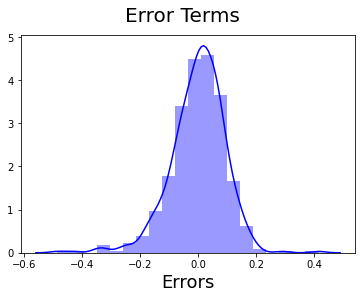

In [297]:
# Plotting the error terms histogram
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20,color='blue')
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

# Making prediction

In [300]:
#Applying same scaler to test set
bike_test[numerical_vars] = scaler.transform(bike_test[numerical_vars])

<ipython-input-300-008e43553e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_test[numerical_vars] = scaler.transform(bike_test[numerical_vars])
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [301]:
#Create x and y tests
y_test = bike_test.pop('Count')
X_test = bike_test

In [302]:
# Let us use the model to make predictions of Count variable.
X_train_new = X_train_rfe14.drop('const',axis=1)

# Creating X_test_new  by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [304]:
# Making predictions
y_pred = lm14.predict(X_test_new)

## Model Evaluation

In [305]:
#Let us calculate R square of test
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8212842875253211

Text(0, 0.5, 'y_pred')

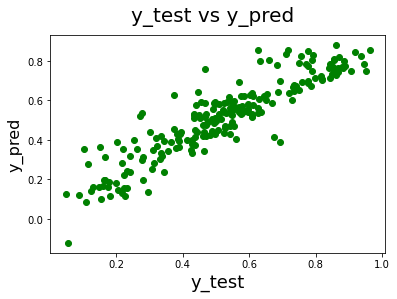

In [306]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color = 'green')
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

Text(0, 0.5, 'Error')

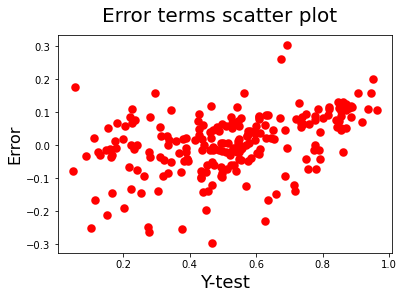

In [322]:
#Error terms

fig = plt.figure()
plt.scatter(y_test,y_test-y_pred, color="red", linewidth=2.5, linestyle="-")

fig.suptitle('Error terms scatter plot', fontsize=20)              
plt.xlabel('Y-test', fontsize=18)                               
plt.ylabel('Error', fontsize=16)                              

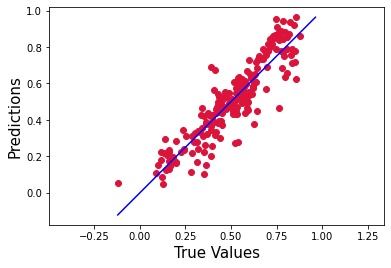

In [338]:
plt.scatter(y_pred,y_test,color='crimson')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()